In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-classification10-class/MY_data/predict/0124.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/023.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/365.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/659.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_241.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/22.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/9.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/011.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/0.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_171.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_31.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_361.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_41.jpeg
/kaggle/input/fruit-classification10-class/MY_data/predict/img_21.jpeg
/kaggle/input/fruit-classificat

# Imports

In [2]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import Sequential
import glob as gb

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
trainpath = "../input/fruit-classification10-class/MY_data/train/"
testpath = "../input/fruit-classification10-class/MY_data/test/"
predpath = "../input/fruit-classification10-class/MY_data/predict/"

print(len(trainpath))
print(len(testpath))
print(len(predpath))

52
51
54


In [5]:
for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath+folder + "/*.jpeg"))
    print(f"for training data , found {len(files)} in folder {folder}")

for training data , found 230 in folder orange
for training data , found 230 in folder strawberries
for training data , found 230 in folder Apple
for training data , found 230 in folder pinenapple
for training data , found 230 in folder kiwi
for training data , found 230 in folder avocado
for training data , found 230 in folder Banana
for training data , found 230 in folder cherry
for training data , found 230 in folder watermelon
for training data , found 231 in folder mango


In [6]:
for folder in os.listdir(testpath):
    files = gb.glob(pathname=str(testpath+folder + "/*.jpeg"))
    print(f"for training data , found {len(files)} in folder {folder}")

for training data , found 97 in folder orange
for training data , found 103 in folder stawberries
for training data , found 89 in folder apple
for training data , found 105 in folder pinenapple
for training data , found 105 in folder kiwi
for training data , found 105 in folder avocado
for training data , found 106 in folder banana
for training data , found 105 in folder cherry
for training data , found 105 in folder watermelon
for training data , found 105 in folder mango


In [7]:
files = gb.glob(pathname=str(predpath+"/*.jpeg"))
print(len(files))

48


In [8]:
classes=sorted(os.listdir(trainpath))
",".join([f"{i}:{c}" for i,c in enumerate(classes)])

'0:Apple,1:Banana,2:avocado,3:cherry,4:kiwi,5:mango,6:orange,7:pinenapple,8:strawberries,9:watermelon'

In [9]:
TRAINING_DIR = trainpath
TESTING_DIR = testpath

train_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        validation_split=0.2
    )


testing_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255
    )

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="training"
)


validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="validation"
)

testing_generator = train_datagen.flow_from_directory(
    TESTING_DIR,
    classes=list(map(lambda x:x.lower().replace("strawberries","stawberries"),classes)),
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical"
)



Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [10]:
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    #A good dose of augmentation so that training data is hard to memorize but not too much to make the learning difficult
    layers.RandomRotation(0.1,input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomFlip(),
    layers.GaussianNoise(0.03),
    
    #convolutional portion
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(64, 3,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(128, 4,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Flatten(),
    
    #Dense portion, with high dropout rate for a high regualization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# add callbacks for early stopping and lr reduction during training 
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# add callbacks for early stopping and lr reduction during training 
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [12]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    verbose=1,
                    callbacks=callback_list)

Epoch 1/100
29/29 [==============================] - 66s 2s/step - loss: 2.3063 - accuracy: 0.1162 - val_loss: 2.2807 - val_accuracy: 0.1804 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - 37s 1s/step - loss: 2.1644 - accuracy: 0.1765 - val_loss: 1.9632 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - 37s 1s/step - loss: 1.9604 - accuracy: 0.2352 - val_loss: 1.7584 - val_accuracy: 0.2891 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - 37s 1s/step - loss: 1.8547 - accuracy: 0.2634 - val_loss: 1.6494 - val_accuracy: 0.2913 - lr: 0.0010
Epoch 5/100
29/29 [==============================] - 37s 1s/step - loss: 1.7487 - accuracy: 0.3199 - val_loss: 1.6057 - val_accuracy: 0.3761 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - 37s 1s/step - loss: 1.7208 - accuracy: 0.3112 - val_loss: 1.5744 - val_accuracy: 0.3739 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - 37s 1s/step - loss: 1.6

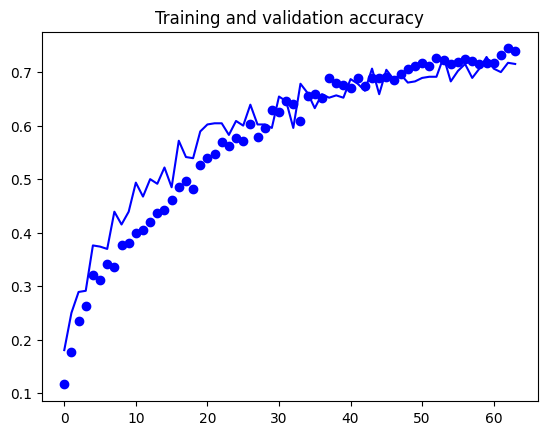

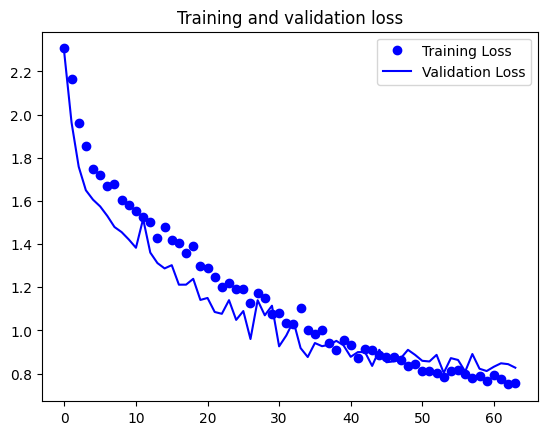

In [13]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Desired output. Charts with training and validation metrics. No crash :)

# Final evaluation on the test set

In [14]:
model.evaluate(testing_generator)

17/17 [==============================] - 22s 1s/step - loss: 1.0103 - accuracy: 0.6907


[1.0102723836898804, 0.6907317042350769]

In [15]:
model.evaluate(validation_generator)

8/8 [==============================] - 7s 887ms/step - loss: 0.8263 - accuracy: 0.7065


[0.8263128995895386, 0.70652174949646]